<style>
.wzor {
  /* width: auto; */
  /* padding: auto; */
  border: 0.5rem solid gray;
  /* margin: 0; */
  background-color: lightgray;
}
</style>


# Modele analizy danych

Tomasz Rodak

---

## Wykład IV

ISLP, rozdz. 3.3, 3.4

---

## Literatura
   1. James, G., Witten, D., Hastie, T., Tibshirani, R., & Taylor,
      J. (2023). An Introduction to Statistical Learning: With
      Applications in Python.
      
      [ISLP](https://www.statlearning.com/)
   
   2. Bishop, C. M., & Nasrabadi, N. M. (2006). Pattern recognition and
      machine learning (Vol. 4, No. 4, p. 738). New York: springer. 
   
      [PRML](https://www.microsoft.com/en-us/research/people/cmbishop/prml-book/)
   
   3. Kroese, D. P., Botev, Z., Taimre, T., & Vaisman, R. (2019). Data
      science and machine learning: mathematical and statistical
      methods. CRC Press.
   
      [https://people.smp.uq.edu.au/DirkKroese/DSML/](https://people.smp.uq.edu.au/DirkKroese/DSML/)
   
   4. Hastie, T., Tibshirani, R., Friedman, J. H., & Friedman,
      J. H. (2009). The elements of statistical learning: data mining,
      inference, and prediction (Vol. 2, pp. 1-758). New York:
      springer.
   
      [https://hastie.su.domains/ElemStatLearn/](https://hastie.su.domains/ElemStatLearn/)
   
   5. Murphy, K. P. (2022). Probabilistic machine learning: an
      introduction. MIT press.
   
      [https://probml.github.io/pml-book/book1.html](https://probml.github.io/pml-book/book1.html)
   
   6. Murphy, K. P. (2023). Probabilistic machine learning: Advanced
      topics. MIT press.
   
      [https://probml.github.io/pml-book/book2.html](https://probml.github.io/pml-book/book2.html)
   
   7. Bishop, C. M., & Bishop, H (2024). Deep learning. Springer.
   
      [https://www.bishopbook.com/](https://www.bishopbook.com/)
   
   8. Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep learning. MIT press.
   
      [https://www.deeplearningbook.org/](https://www.deeplearningbook.org/)

---

## Spis treści

1. Zmienne jakościowe
    - Zmienna jakościowa o dwóch wartościach  
    - Zmienna jakościowa o więcej niż dwóch wartościach
2. Rozszerzanie modelu liniowego
    - Zależność nieaddytywna
    - Zależność nieliniowa
3. Problemy występujące w modelu liniowym
    - Brak liniowości
    - Korelacja reszt
    - Heteroskedastyczność
    - Wartości odstające
    - Punkty wpływowe
    - Współliniowość

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.api as sm

## 1. Zmienne jakościowe

Predyktory rozważane do tej pory były zmiennymi ilościowymi. Często jednak w danych pojawiają się zmienne jakościowe. Przykładem może być płeć, kolor oczu, odpowiedzi tak/nie itp. Aby wykorzystać tego typu zmienne w modelu regresji liniowej należy je odpowiednio zakodować.

### 1.1 Zmienna jakościowa o dwóch wartościach

W zbiorze `Credit.csv` mamy cztery zmienne jakościowe: `Own`, `Student`, `Married` i `Region`. Zmienną celu jest `Balance` - zmienna ilościowa. Poza tym mamy predyktory ilościowe: `Income`, `Limit`, `Rating`, `Cards`, `Age` i `Education`. 

In [2]:
credit = pd.read_csv('datasets/Credit.csv')
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331


Jeśli zmienna jakościowa przyjmuje tylko dwie wartości (jest binarna), to można ją zakodować jako jedną zmienną numeryczną, przyjmującą dwie wartości. Na przykład $i$-tą obserwację `Own` możemy zastąpić przez 

\begin{equation*}
\texttt{Own}_i =
\begin{cases}
1, & \text{jeśli } \texttt{Own}_i = \text{Yes}, \\
0, & \text{jeśli } \texttt{Own}_i = \text{No}.
\end{cases}
\end{equation*}

Wówczas model regresji liniowej `Balance` względem `Own` ma postać

\begin{equation*}
\texttt{Balance}_i = \beta_0 + \beta_1 \texttt{Own}_i + \varepsilon_i=
\begin{cases}
\beta_0 + \beta_1 + \varepsilon_i, & \text{jeśli } \texttt{Own}_i = \text{Yes}, \\
\beta_0 + \varepsilon_i, & \text{jeśli } \texttt{Own}_i = \text{No}.
\end{cases}
\end{equation*}

Parametry $\beta_0$ i $\beta_1$ uzyskują wówczas interpretację:

* $\beta_0$ - oczekiwana wartość zmiennej `Balance` dla osób, które nie posiadają nieruchomości,
* $\beta_0 + \beta_1$ - oczekiwana wartość zmiennej `Balance` dla osób, które posiadają nieruchomość,
* $\beta_1$ - różnica oczekiwanych wartości zmiennej `Balance` między osobami, które posiadają nieruchomość i osobami, które jej nie posiadają.

In [3]:
credit['Own_num'] = credit['Own'].map({'Yes': 1, 'No': 0}) # nowa kolumna z kodowaniem 0-1
sm.OLS(credit['Balance'], sm.add_constant(credit['Own_num'])).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,509.8031,33.128,15.389,0.000,444.675,574.931
Own_num,19.7331,46.051,0.429,0.669,-70.801,110.267


Z modelu wynika, że osoby nie posiadające nieruchomości mają średnio 510 dolarów długu, osoby posiadające nieruchomość średnio o 20 dolarów długu więcej. Jednak duża $p$-wartość dla $\beta_1$ sugeruje, że różnica ta nie jest istotna statystycznie.

Inne kodowania:

In [4]:
credit['Own_num'] = credit['Own'].map({'Yes': 0, 'No': 1}) 
sm.OLS(credit['Balance'], sm.add_constant(credit['Own_num'])).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,529.5362,31.988,16.554,0.000,466.649,592.423
Own_num,-19.7331,46.051,-0.429,0.669,-110.267,70.801


In [5]:
credit['Own_num'] = credit['Own'].map({'Yes': 1, 'No': -1}) 
res = sm.OLS(credit['Balance'], sm.add_constant(credit['Own_num'])).fit()
res.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,519.6697,23.026,22.569,0.000,474.403,564.937
Own_num,9.8666,23.026,0.429,0.669,-35.400,55.134


Ostatni model ma postać:

\begin{equation*}
\texttt{Balance}_i = \beta_0 + \beta_1 \texttt{Own}_i + \varepsilon_i=
\begin{cases}
\beta_0 + \beta_1 + \varepsilon_i, & \text{jeśli } \texttt{Own}_i = \text{Yes}, \\
\beta_0 - \beta_1 + \varepsilon_i, & \text{jeśli } \texttt{Own}_i = \text{No}.
\end{cases}
\end{equation*}

W tym przypadku:

* $\beta_0$ - wartość oczekiwana zmiennej `Balance` dla całej populacji:

\begin{equation*}
\beta_0 = \frac{1}{2}(\beta_0 - \beta_1) + \frac{1}{2}(\beta_0 + \beta_1) 
\end{equation*}

*  $\beta_0 - \beta_1$ (odpowiednio $\beta_0 + \beta_1$) - wartości oczekiwane zmiennej `Balance` dla osób, które nie posiadają (odpowiednio posiadają) nieruchomość.

Należy pamiętać, że zmiana kodowania zmienia interpretację parametrów modelu, nie zmienia jednak jego przewidywań.

### 1.2 Zmienna jakościowa o więcej niż dwóch wartościach

Gdy zmienna jakościowa przyjmuje więcej niż dwie wartości, to można ją zakodować stosując tzw. *One Hot Encoding*. Polega on na zamianie zmiennej jakościowej o $K$ wartościach na $K-1$ zmiennych binarnych. Na przykład zmienną `Region` można zakodować w następujący sposób:

\begin{equation*}
\texttt{Region}_{i1} =
\begin{cases}
1, & \text{jeśli } \texttt{Region}_i = \text{South}, \\
0, & \text{jeśli } \texttt{Region}_i \neq \text{South},
\end{cases}
\end{equation*}

\begin{equation*}
\texttt{Region}_{i2} =
\begin{cases}
1, & \text{jeśli } \texttt{Region}_i = \text{West}, \\
0, & \text{jeśli } \texttt{Region}_i \neq \text{West},
\end{cases}
\end{equation*}

Wartości $\text{South}$, $\text{West}$ i $\text{East}$ są wówczas kodowane przez wektory $(1,0)^T$, $(0,1)^T$ i $(0,0)^T$. Współrzędne tych wektorów są dodatkowymi zmiennymi binarnymi wykorzystywanymi jako predyktory w zastępstwie zmiennej jakościowej `Region`. Teraz model regresji liniowej `Balance` względem `Region` ma postać

\begin{equation*}
\texttt{Balance}_i = \beta_0 + \beta_1 \texttt{Region}_{i1} + \beta_2 \texttt{Region}_{i2} + \varepsilon_i=
\begin{cases}
\beta_0 + \beta_1 + \varepsilon_i, & \text{jeśli } \texttt{Region}_i = \text{South}, \\
\beta_0 + \beta_2 + \varepsilon_i, & \text{jeśli } \texttt{Region}_i = \text{West}, \\
\beta_0 + \varepsilon_i, & \text{jeśli } \texttt{Region}_i = \text{East}.
\end{cases}
\end{equation*}

Wówczas 
* $\beta_0$ - oczekiwana wartość zmiennej `Balance` dla osób z regionu `East`,
* $\beta_0 + \beta_1$ - oczekiwana wartość zmiennej `Balance` dla osób z regionu `South`,
* $\beta_0 + \beta_2$ - oczekiwana wartość zmiennej `Balance` dla osób z regionu `West`.

Poziom, dla którego nie zdefiniowano zmiennej binarnej, jest poziomem *referencyjnym* (*bazowym*, *baseline*). W rozważanym przykładzie poziomem referencyjnym jest `East`.

In [6]:
credit['Region_num_1'] = credit['Region'].map({'South': 1, 'East': 0, 'West': 0})
credit['Region_num_2'] = credit['Region'].map({'South': 0, 'East': 0, 'West': 1})
result = sm.OLS(credit['Balance'], sm.add_constant(credit[['Region_num_1', 'Region_num_2']])).fit()
result.summary().tables[0]

Dep. Variable:,Balance,R-squared:,0.000
Model:,OLS,Adj. R-squared:,-0.005
Method:,Least Squares,F-statistic:,0.04344
Date:,"Wed, 06 Nov 2024",Prob (F-statistic):,0.957
Time:,10:07:40,Log-Likelihood:,-3019.3
No. Observations:,400,AIC:,6045.
Df Residuals:,397,BIC:,6057.
Df Model:,2,,
Covariance Type:,nonrobust,,


In [7]:
result.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,531.0000,46.319,11.464,0.000,439.939,622.061
Region_num_1,-12.5025,56.681,-0.221,0.826,-123.935,98.930
Region_num_2,-18.6863,65.021,-0.287,0.774,-146.515,109.142


Wartość referencyjna zadłużenia, czyli dla osób z regionu `East`, wynosi 531 dolary. Osoby z regionu `South` mają średnio o 13 dolarów, a osoby z regionu `West` średnio o 19 dolarów mniejsze zadłużenie. Jednak $p$-wartości dla $\beta_1$ i $\beta_2$ są duże, co sugeruje, że różnice te nie są istotne statystycznie. Warto zwrócić uwagę, że mowa tu o różnicach między danym poziomem a poziomem referencyjnym. Różnice między poziomami `South` i `West` nie są rozważane. Ponadto $p$-wartość dla statystyki $F$ jest również duża (0.957), więc nie możemy odrzucić hipotezy zerowej $H_0:\ \beta_1=\beta_2=0$. Wskazuje to na brak zależności `Balance` od `Region`.

## 2. Rozszerzanie modelu liniowego

Model liniowy opiera się na dwóch założeniach:

* *addytywności* - wpływ każdego predyktora na zmienną celu jest niezależny od pozostałych predyktorów,
* *liniowości* - wpływ każdego predyktora na zmienną celu jest liniowy, czyli zmiana wartości predyktora o jedną jednostkę powoduje zmianę wartości zmiennej celu o stałą wartość, bez względu na wartość predyktora.

### 2.1 Zależność nieaddytywna

Rozważmy model:

\begin{equation*}
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \varepsilon.
\end{equation*}

Zmiana $X_1$ o jedną jednostkę powoduje zmianę $Y$ o $\beta_1$ niezależnie od aktualnej wartości $X_2$. Może się zdarzyć, że wpływ $X_1$ na $Y$ zależy od tego jaką akurat wartość ma $X_2$. Jeden ze sposobów na uwzględnienie takiej zależności to dodanie do modelu *interakcji* między $X_1$ i $X_2$:

\begin{equation*}
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_1 X_2 + \varepsilon.
\end{equation*}

Zauważmy, że wówczas $Y$ można zapisać w postaci:

\begin{equation*}
\begin{split}
Y &= \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_1 X_2 + \varepsilon \\
&= \beta_0 + (\beta_1 + \beta_3 X_2) X_1 + \beta_2 X_2 + \varepsilon \\
&= \beta_0 + \tilde{\beta}_1 X_1 + \beta_2 X_2 + \varepsilon.
\end{split}
\end{equation*}

Teraz $\tilde{\beta}_1$ jest współczynnikiem przy $X_1$ zależnym od $X_2$. Wpływ $X_1$ na $Y$ zależy od aktualnej wartości $X_2$.

Przykład ilustrujący tę koncepcję to regresja liczby produkowanych w fabryce jednostek `units` w zależnosci od liczby linii produkcyjnych `lines` i liczby pracowników `workers`. Ogólnie rzecz biorąc, wzrost liczby linii produkcyjnych powoduje wzrost liczby produkowanych jednostek, ale wpływ ten zależy jednak od liczby pracowników. W przypadku małej liczby pracowników wzrost liczby linii produkcyjnych nie spowoduje oczekiwanego wzrostu liczby produktów (bo nie ma kto obsłużyć tych linii).

Załóżmy, że dopasowaliśmy model regresji liniowej `units` względem `lines` i `workers` z interakcją między `lines` i `workers`:

\begin{equation*}
\begin{split}
\texttt{units} &= 1.2 + 3.4\cdot\texttt{lines} + 0.22\cdot\texttt{workers} + 1.4\cdot\texttt{lines}\cdot\texttt{workers} \\
&= 1.2 + (3.4 + 1.4\cdot\texttt{workers})\cdot\texttt{lines} + 0.22\cdot\texttt{workers} .
\end{split}
\end{equation*}

Wówczas dodanie kolejnej linii spowoduje wzrost liczby produkowanych jednostek o $3.4 + 1.4\cdot\texttt{workers}$. Podobnie dodanie kolejnego pracownika spowoduje wzrost liczby produkowanych jednostek o $0.22 + 1.4\cdot\texttt{lines}$. 


Rozważmy teraz model regresji sprzedaży `sales` względem `TV` i `radio` z interakcją między `TV` i `radio` ze zbioru `Advertising.csv`:

In [9]:
df = pd.read_csv('datasets/Advertising.csv', usecols=[1,2,3,4])
df['TVxradio'] = df['TV'] * df['radio']
result = sm.OLS(df['sales'], sm.add_constant(df[['TV', 'radio', 'TVxradio']])).fit()
result.summary().tables[0]

Dep. Variable:,sales,R-squared:,0.968
Model:,OLS,Adj. R-squared:,0.967
Method:,Least Squares,F-statistic:,1963.
Date:,"Wed, 06 Nov 2024",Prob (F-statistic):,6.68e-146
Time:,10:08:02,Log-Likelihood:,-270.14
No. Observations:,200,AIC:,548.3
Df Residuals:,196,BIC:,561.5
Df Model:,3,,
Covariance Type:,nonrobust,,


In [10]:
result.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,6.7502,0.248,27.233,0.000,6.261,7.239
TV,0.0191,0.002,12.699,0.000,0.016,0.022
radio,0.0289,0.009,3.241,0.001,0.011,0.046
TVxradio,0.0011,5.24e-05,20.727,0.000,0.001,0.001


$p$-wartość dla interakcji `TVxradio` jest bardzo mała, więc możemy odrzucić hipotezę zerową $H_0:\ \beta_3=0$ i przyjąć, że prawdziwa relacja między `sales`, `TV` i `radio` nie jest addytywna. Ponadto współczynnik determinacji $R^2$ wzrósł znacząco po dodaniu interakcji: z 0.897 do 0.968. Oznacza to, że model z interakcją lepiej wyjaśnia zmienność `sales` niż model bez interakcji.

Z tabelki powyżej odczytujemy, że dodatkowy $1000$ wydany na reklamę w telewizji powoduje wzrost sprzedaży o $(0.0191 + 0.0011\cdot\texttt{radio})\cdot 1000 = 19.1 + 1.1\cdot\texttt{radio}$ jednostek. Podobnie dodatkowy $1000$ wydany na reklamę w radiu powoduje wzrost sprzedaży o $(0.0289 + 0.0011\cdot\texttt{TV})\cdot 1000 = 28.9 + 1.1\cdot\texttt{TV}$ jednostek.

Wszystkie parametry w podanym wyżej modelu z interakcją są istotne statystycznie i dlatego nie należy usuwać z modelu żadnego z nich. Gdyby dodanie interakcji spowodowało, że parametry `TV` lub `radio` stałyby się nieistotne statystycznie, to i tak należałoby je w modelu zostawić. Usunięcie któregoś z nich spowodowałoby bowiem załamanie podanej wyżej interpretacji parametrów modelu jako zależnych od wartości pozostałych predyktorów. To wymaganie zachowania struktury modelu jest przejawem *zasady hierarchiczności*.

Interakcje można stosować również w przypadku zmiennych jakościowych oraz kombinacji zmiennych jakościowych i ilościowych. Przykładem może być model regresji `Balance` względem `Income` i `Student` ze zbioru `Credit.csv`. Jeśli brak interakcji między `Income` i `Student`, to model ma postać:

\begin{equation*}
\begin{split}
\texttt{Balance}_i &= \beta_0 + \beta_1 \texttt{Income}_i + \beta_2 \texttt{Student}_i \\
&= \beta_1\cdot\texttt{Income}_i +
\begin{cases}
\beta_0 + \beta_2, & \text{jeśli } \texttt{Student}_i = \text{Yes}, \\
\beta_0 , & \text{jeśli } \texttt{Student}_i = \text{No}.
\end{cases}
\end{split}
\end{equation*}

Przyjęliśmy tu kodowanie zmiennej `Student`: `Yes` - 1, `No` - 0. Zauważmy, że model ten to dwie równoległe proste regresji `Balance` względem `Income`: jedna dla studentów, druga dla osób niebędących studentami. Współczynnik $\beta_1$ jest wspólny dla obu prostych, inny jest natomiast intercept: $\beta_0$ dla osób niebędących studentami i $\beta_0 + \beta_2$ dla studentów. 

In [11]:
credit['Student_num'] = credit['Student'].map({'Yes': 1, 'No': 0})
result = sm.OLS(credit['Balance'], sm.add_constant(credit[['Income', 'Student_num']])).fit()
result.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,211.1430,32.457,6.505,0.000,147.333,274.952
Income,5.9843,0.557,10.751,0.000,4.890,7.079
Student_num,382.6705,65.311,5.859,0.000,254.272,511.069


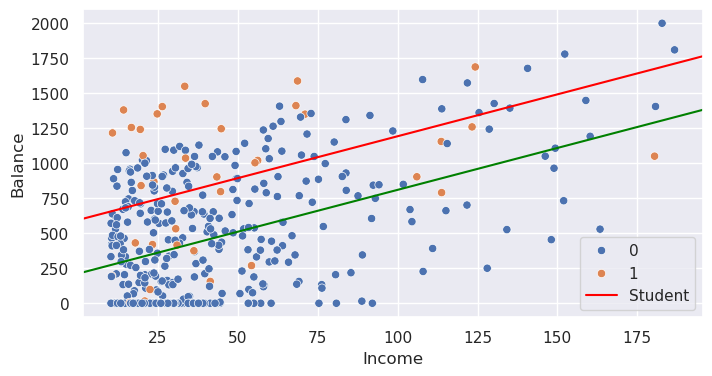

In [12]:
fig, ax = plt.subplots(figsize=(8,4))
x0, x1 = credit['Income'].min(), credit['Income'].max()
sns.scatterplot(x='Income', y='Balance', hue='Student_num', data=credit, ax=ax)
# ax.scatter(credit['Income'], credit['Balance'], c=credit['Student_num'], 
#            cmap='viridis', alpha=0.7)
ax.axline((x0, result.predict([1, x0, 0])[0]), (x1, result.predict([1, x1, 0])[0]),
          color='green')
ax.axline((x0, result.predict([1, x0, 1])[0]), (x1, result.predict([1, x1, 1])[0]),
          color='red', label='Student')
ax.legend();

Wprowadzenie interakcji między `Income` i `Student` powoduje, że teraz model składa się z dwóch prostych regresji z różnymi współczynnikami kierunkowymi i różnymi interceptami. Zakładając kodowanie jak wyżej, model ma postać:


\begin{equation*}
\begin{split}
\texttt{Balance}_i &= \beta_0 + \beta_1\cdot \texttt{Income}_i + \beta_2\cdot \texttt{Student}_i + \beta_3\cdot \texttt{Income}_i\cdot\texttt{Student}_i \\
&=\beta_0 + \beta_1\cdot\texttt{Income}_i +
\begin{cases}
\beta_2 + \beta_3\cdot\texttt{Income}_i, & \text{jeśli } \texttt{Student}_i = \text{Yes}, \\
0 , & \text{jeśli } \texttt{Student}_i = \text{No},
\end{cases}\\
&=
\begin{cases}
(\beta_0 + \beta_2) + (\beta_1 + \beta_3)\cdot\texttt{Income}_i, & \text{jeśli } \texttt{Student}_i = \text{Yes}, \\
\beta_0 + \beta_1\cdot\texttt{Income}_i, & \text{jeśli } \texttt{Student}_i = \text{No}.
\end{cases}
\end{split}
\end{equation*}


In [13]:
credit['StudentxIncome'] = credit['Student_num'] * credit['Income']
result = sm.OLS(credit['Balance'], sm.add_constant(credit[['Income', 'Student_num', 'StudentxIncome']])).fit()
result.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,200.6232,33.698,5.953,0.000,134.373,266.873
Income,6.2182,0.592,10.502,0.000,5.054,7.382
Student_num,476.6758,104.351,4.568,0.000,271.524,681.827
StudentxIncome,-1.9992,1.731,-1.155,0.249,-5.403,1.404


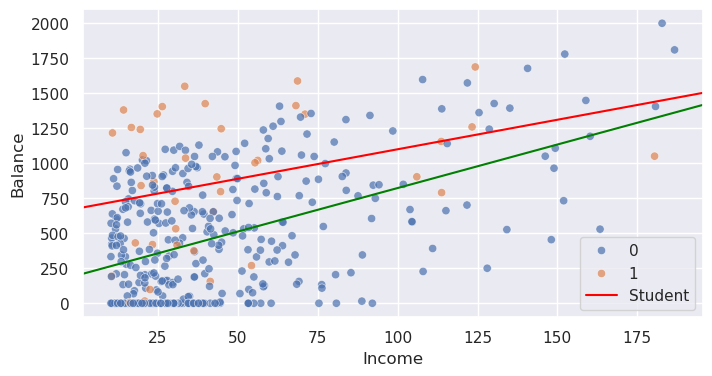

In [14]:
fig, ax = plt.subplots(figsize=(8,4))
x0, x1 = credit['Income'].min(), credit['Income'].max()
sns.scatterplot(x='Income', y='Balance', hue='Student_num', data=credit, ax=ax, alpha=0.7)
ax.axline((x0, result.predict([1, x0, 0, 0])[0]), (x1, result.predict([1, x1, 0, 0])[0]),
            color='green')
ax.axline((x0, result.predict([1, x0, 1, 1*x0])[0]), (x1, result.predict([1, x1, 1, 1*x1])[0]),
            color='red', label='Student')
ax.legend();

### 2.2 Zależność nieliniowa

Jeden ze sposobów na uwzględnienie zależności nieliniowych w danych jest dodanie do modelu regresji nowych zmiennych będących nieliniowymi przeksztalceniami zmiennych oryginalnych. Przykładem może być model regresji `mpg` względem `horsepower` ze zbioru `Auto.csv`. Wykres rozproszenia sugeruje, że zależność między `mpg` a `horsepower` jest nieliniowa:

In [16]:
auto = pd.read_csv('datasets/Auto.csv', na_values='?').dropna() 
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


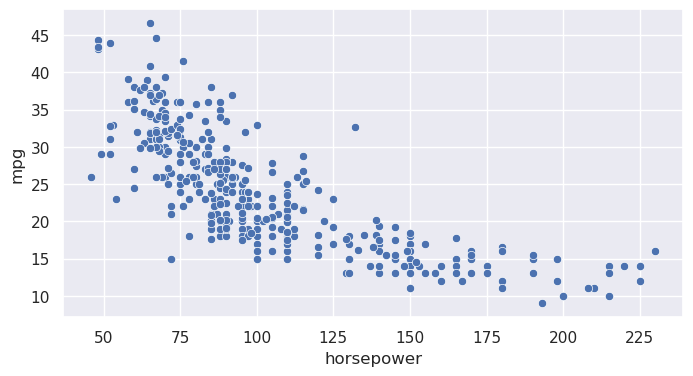

In [17]:
fig, ax = plt.subplots(figsize=(8,4))
sns.scatterplot(data=auto, x='horsepower', y='mpg', ax=ax);

Punkty leżą na wykresie rozproszenia wzdłuż krzywej przypominającej parabolę. W takiej sytuacji można dodać do modelu regresji nową zmienną będącą kwadratem `horsepower`:

\begin{equation*}
\texttt{mpg} = \beta_0 + \beta_1 \texttt{horsepower} + \beta_2 \texttt{horsepower}^2 + \varepsilon.
\end{equation*}

In [18]:
auto['horsepower2'] = auto['horsepower']**2
result = sm.OLS(auto['mpg'], sm.add_constant(auto[['horsepower', 'horsepower2']])).fit()
result.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,56.9001,1.800,31.604,0.000,53.360,60.440
horsepower,-0.4662,0.031,-14.978,0.000,-0.527,-0.405
horsepower2,0.0012,0.000,10.080,0.000,0.001,0.001


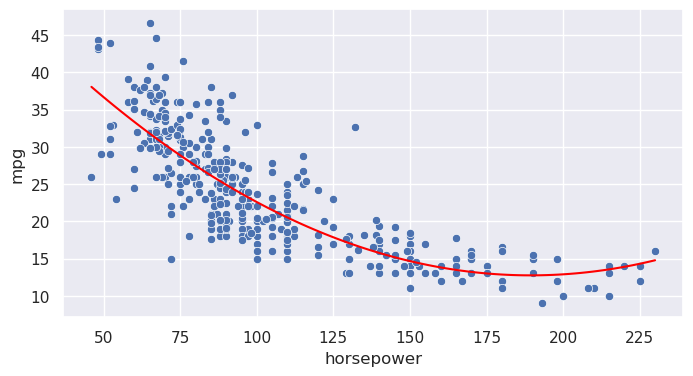

In [19]:
fig, ax = plt.subplots(figsize=(8,4))
sns.scatterplot(data=auto, x='horsepower', y='mpg', ax=ax)
x = np.linspace(auto['horsepower'].min(), auto['horsepower'].max(), 100) # tym razem dwa punkty nie wystarczą!
x_matrix = sm.add_constant(np.hstack([x.reshape(-1,1), x.reshape(-1,1)**2]))
sns.lineplot(x=x, y=result.predict(x_matrix), ax=ax, color='red');


Dodanie do modelu wielu nowych zmiennych będących nieliniowymi przekształceniami zmiennych oryginalnych zwiększa złożoność modelu oraz może spowodować jego przeuczenie. 

## 3. Problemy występujące w modelu liniowym

### 3.1 Brak liniowości

Problem braku liniowości pomaga wykryć wykres rozproszenia reszt względem predyktora (w przypadku modelu z jednym predyktorem) lub wykres rozproszenia reszt względem wartości przewidywanych (w przypadku modelu z wieloma predyktorami). Oto przykład dla dwóch modeli `mpg` względem `horsepower`:

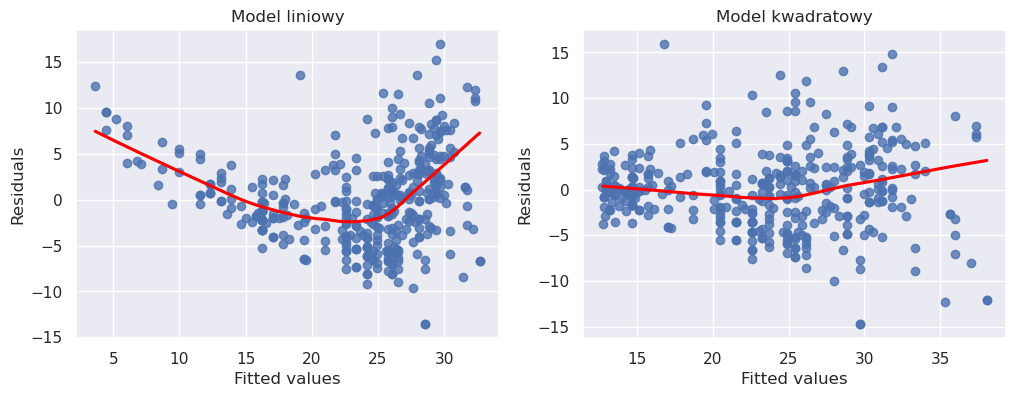

In [20]:
res0 = sm.OLS(auto['mpg'], sm.add_constant(auto['horsepower'])).fit()
res1 = sm.OLS(auto['mpg'], sm.add_constant(auto[['horsepower', 'horsepower2']])).fit()
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12,4))
sns.regplot(x=res0.fittedvalues, y=res0.resid, ax=ax0, lowess=True, line_kws={'color': 'red'})
sns.regplot(x=res1.fittedvalues, y=res1.resid, ax=ax1, lowess=True, line_kws={'color': 'red'})
ax0.set(xlabel='Fitted values', ylabel='Residuals', title='Model liniowy')
ax1.set(xlabel='Fitted values', ylabel='Residuals', title='Model kwadratowy');

Innym sposobem jest zastąpienie oryginalnego predyktora $X$ przez jego nieliniowe przekształcenie, np. $X^2$, $\sqrt{X}$, $\log(X)$, $e^X$ itp. 

### 3.2 Korelacja reszt

Zgodnie z założeniami modelu regresji reszty odpowiadające błędom losowym $\varepsilon_i$ powinny być niezależne od siebie. Jeśli jednak występuje korelacja między resztami, to oznacza to, że w danych występuje jakaś zależność, która nie została uwzględniona w modelu i pozostała w resztach. Skutkiem korelacji reszt jest nadmierne zmniejszenie $p$-wartości dla parametrów modelu i zawężenie przedziałów ufności.

### 3.3 Heteroskedastyczność

Reszty powinny mieć jednakową wariancję, w modelu zakłada się bowiem, że wariancja błędu losowego $\varepsilon_i$ jest stała (choć nieznana). Jeśli wariancja reszt jest różna dla różnych wartości predyktora, to mówimy o heteroskedastyczności. 

W przypadku wystąpienia heteroskedastyczności można próbować zastosować wklęsłe przekształcenie zmiennej celu $Y$, np. $\sqrt{Y}$, $\log(Y)$.

### 3.4 Wartości odstające (*outliers*)

Wartości odstające to obserwacje, które znacznie odbiegają od pozostałych obserwacji. Mogą one powodować duże zmiany parametrów modelu i wartości $R^2$. 

Wartości odstające można wykryć na wykresie rozproszenia reszt lub studentyzowanych reszt względem wartości przewidywanych.

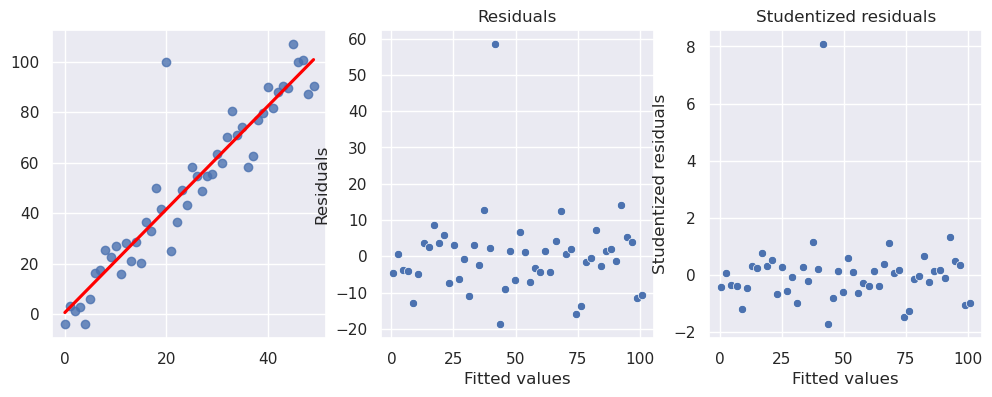

In [21]:
x = np.arange(50)
y = 2*x + np.random.normal(scale=7, size=len(x))
y[20] = 100 # wartość odstająca
result = sm.OLS(y, sm.add_constant(x)).fit()
student_resid = result.outlier_test()[:, 0]
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12,4))
sns.regplot(x=x, y=y, ax=ax0, line_kws={'color': 'red'}, ci=None)
sns.scatterplot(x=result.fittedvalues, y=result.resid, ax=ax1)
sns.scatterplot(x=result.fittedvalues, y=student_resid, ax=ax2);
ax1.set(xlabel='Fitted values', ylabel='Residuals', title='Residuals')
ax2.set(xlabel='Fitted values', ylabel='Studentized residuals', title='Studentized residuals');

### 3.5 Punkty wpływowe (*leverage points*)

Punkty wpływowe to obserwacje, które znacznie odbiegają od pozostałych obserwacji pod względem wartości predyktora. Mogą one powodować duże zmiany parametrów modelu i wartości $R^2$.

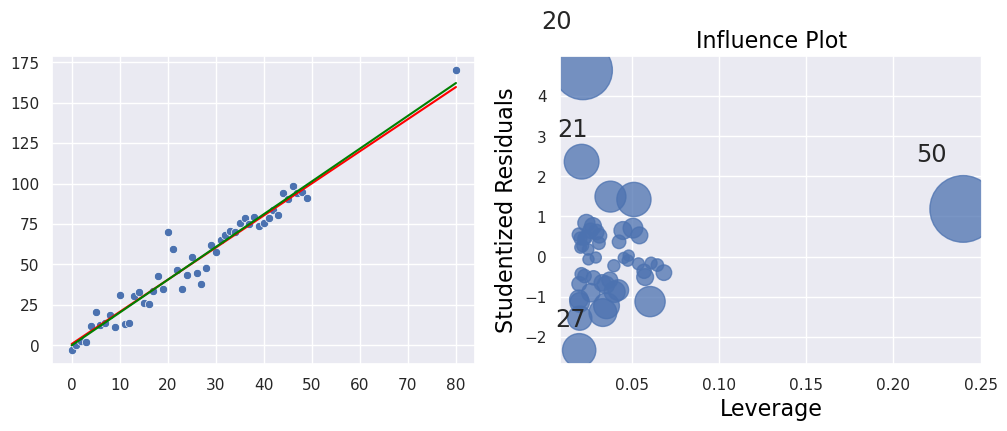

In [22]:
x = np.arange(50)
y = 2*x + np.random.normal(scale=7, size=len(x))
y[20] = 70 # wartość odstająca
x = np.append(x, 80)
y = np.append(y, 2*80 + 10)
res0 = sm.OLS(y[:-1], sm.add_constant(x[:-1])).fit()
res1 = sm.OLS(y, sm.add_constant(x)).fit()
xx = np.linspace(x.min(), x.max(), 100)
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12,4))
sns.scatterplot(x=x, y=y, ax=ax0)
sns.lineplot(x=xx, y=res0.predict(sm.add_constant(xx)), ax=ax0, color='red')
sns.lineplot(x=xx, y=res1.predict(sm.add_constant(xx)), ax=ax0, color='green')
sm.graphics.influence_plot(res1, ax=ax1, criterion='cooks');

### 3.6 Współliniowość

Współliniowość to zjawisko, w którym dwa lub więcej predyktorów są ze sobą silnie skorelowane. Jeśli predyktory $X_i$ i $X_j$ są ze sobą silnie skorelowane, to oznacza to, że w modelu występuje zależność między $X_i$ i $X_j$. Wówczas model nie jest w stanie jednoznacznie określić indywidualnego wpływu $X_i$ i $X_j$ na $Y$.

Współliniowość można wykryć na wykresie rozproszenia predyktorów lub na wykresie korelacji między predyktorami.

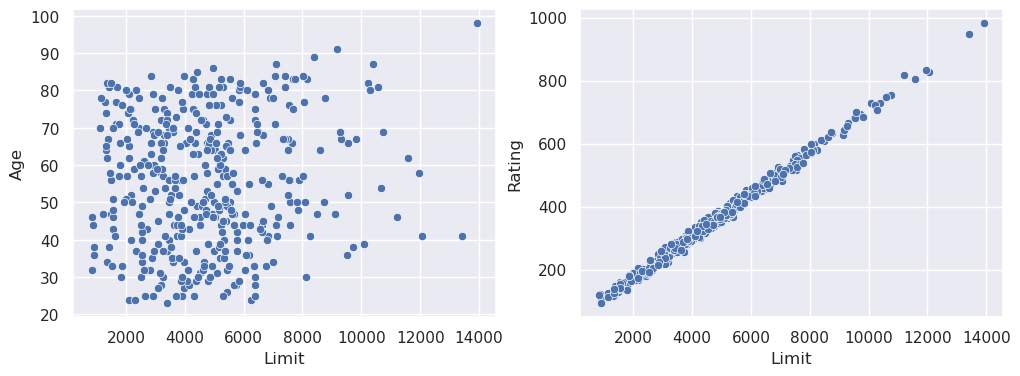

In [23]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12,4))
sns.scatterplot(data=credit, x='Limit', y='Age', ax=ax0)
sns.scatterplot(data=credit, x='Limit', y='Rating', ax=ax1);

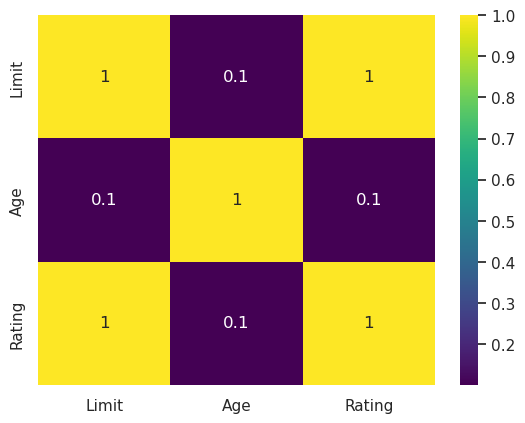

In [24]:
sns.heatmap(credit[['Limit', 'Age', 'Rating']].corr(), annot=True, cmap='viridis');

Wykres konturowy $\text{RSS}$ w przestrzeni parametrów $\beta_1$ i $\beta_2$ dla dwóch modeli regresji: `Balance` względem `Limit` i `Age` oraz `Balance` względem `Limit` i `Rating` (bez intecreptu):

In [25]:
def RSS(b1, b2, v1, v2):
    return np.sum((credit['Balance'] - (b1*credit[v1] + b2*credit[v2]))**2)

b1 = np.linspace(.15, 0.18, 100)
b2 = np.linspace(-5, -3, 100)
B1, B2 = np.meshgrid(b1, b2)
RSS_values0 = np.array([RSS(b1, b2, 'Limit', 'Age') for b1, b2 in zip(np.ravel(B1), np.ravel(B2))]) / 1_000_000

In [26]:
b1 = np.linspace(-.1, .2, 100)
b2 = np.linspace(0, 5, 100)
B1, B2 = np.meshgrid(b1, b2)
RSS_values1 = np.array([RSS(b1, b2, 'Limit', 'Rating') for b1, b2 in zip(np.ravel(B1), np.ravel(B2))]) / 10_000_000

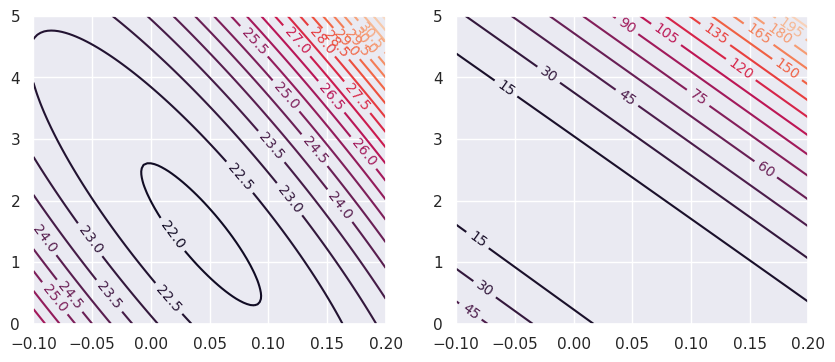

In [27]:
fig, (ax0, ax1) = plt.subplots(figsize=(10,4), ncols=2)
cs = ax0.contour(B1, B2, RSS_values0.reshape(B1.shape), 20)
ax0.clabel(cs, inline=1, fontsize=10) 
cs = ax1.contour(B1, B2, RSS_values1.reshape(B1.shape), 20)
ax1.clabel(cs, inline=1, fontsize=10);

Współliniowość powoduje wzrost błędu standardowego parametrów modelu, spadek statystyki $t$ i w rezultacie wzrost $p$-wartości. 

In [28]:
sm.OLS(credit['Balance'], sm.add_constant(credit[['Limit', 'Age']])).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,-173.4109,43.828,-3.957,0.000,-259.576,-87.246
Limit,0.1734,0.005,34.496,0.000,0.163,0.183
Age,-2.2915,0.672,-3.407,0.001,-3.614,-0.969


In [29]:
sm.OLS(credit['Balance'], sm.add_constant(credit[['Limit', 'Rating']])).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,-377.5368,45.254,-8.343,0.000,-466.505,-288.569
Limit,0.0245,0.064,0.384,0.701,-0.101,0.150
Rating,2.2017,0.952,2.312,0.021,0.330,4.074


Niestety, może się okazać, że żadne dwa predyktory nie są ze sobą skorelowane, a jednak współliniowość występuje, tyle że w większych grupach predyktorów. Wówczas nie jesteśmy w stanie wykryć współliniowości na wykresie rozproszenia predyktorów ani w macierzy korelacji. W takiej sytuacji można zastosować tzw. *współczynnik wariancji inflacji* (ang. *variance inflation factor*, *VIF*). Współczynnik ten jest zdefiniowany jako

\begin{equation*}
\text{VIF} = \frac{1}{1-R^2_{X_i|X_{-i}}},
\end{equation*}

gdzie $R^2_{X_i|X_{-i}}$ jest współczynnikiem determinacji modelu regresji $X_i$ względem pozostałych predyktorów. Współczynnik ten jest równy 1, gdy kolumna  wartości predyktora $X_i$ jest prostopadła do kolumny wartości każdego z pozostałych predyktorów. Gdy wartość VIF wzrasta, to kolumna wartości predyktora $X_i$ tworzy coraz mniejszy kąt z przestrzenią rozpiętą przez pozostałe predyktory. Oznacza to, że $X_i$ jest coraz bardziej skorelowany z pozostałymi predyktorami (niesie coraz mniej nowej informacji) i coraz bliższy współliniowości.

Współczynnik VIF można wyznaczyć dla każdego predyktora. Współczynniki VIF dla modelu regresji `Balance` względem `Limit`, `Age` i `Rating`:

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = sm.add_constant(credit[['Limit', 'Age', 'Rating']])
pd.Series([variance_inflation_factor(X.values, i) for i in range(1, X.shape[1])], index=X.columns[1:])

Limit     160.592880
Age         1.011385
Rating    160.668301
dtype: float64